# Multi-session analysis
This notebook demonstrate how to combine different xarray dataset together and perform group-level analysis

In [52]:
%reload_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from glob import glob
import re
from datetime import datetime
from trialexp.process.folder_org.utils import build_session_info, load_and_concat_dataset, filter_sessions
from trialexp.process.group_analysis.plot_utils import plot_group_average, plot_subject_average, plot_subject_comparison, equal_subsample_trials
import itertools
import patchworklib as pw

## Load selected sessions

In [4]:
#specify the location of the by_sessions folder here
root_path = '/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions'

DA_sessions = pd.read_pickle('DA_sessions.pkl')
ACh_sessions = pd.read_pickle('ACh_sessions.pkl')

## Read xarray datasets

In [6]:
#select the last 5 sessions from animal kms058
ds_combined_DA = load_and_concat_dataset(DA_sessions.path)
ds_combined_ACh = load_and_concat_dataset(ACh_sessions.path)

  0%|          | 0/31 [00:00<?, ?it/s]

/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms063-2023-04-01-180930/processed/xr_session.nc not found! skipping
/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms062-2023-02-23-143355/processed/xr_session.nc not found! skipping
/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms064-2023-02-14-115018/processed/xr_session.nc not found! skipping
Concating datasets...


  0%|          | 0/23 [00:00<?, ?it/s]

/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT001-2023-06-02-163605/processed/xr_session.nc not found! skipping
/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT005-2023-06-02-152309/processed/xr_session.nc not found! skipping
/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/RE607-2023-06-05-131232/processed/xr_session.nc not found! skipping
Concating datasets...


## Plot and compare group average 

In [95]:
sns.set_context('talk',font_scale=1)

animal_id_DA = DA_sessions[['animal_id','session_id', 'expt_datetime']]
animal_id_ACh = ACh_sessions[['animal_id','session_id', 'expt_datetime']]


vars_to_plot = ['hold_for_water_zscored_df_over_f', 
                'first_bar_off_zscored_df_over_f',
                'first_spout_zscored_df_over_f',
                'last_bar_off_zscored_df_over_f']


average_mode = ['equal_subsample', 'mean_of_mean']

# vars_to_plot = ['hold_for_water_zscored_df_over_f']

# average_mode = ['equal_subsample']

for v, mode in tqdm(list(itertools.product(vars_to_plot, average_mode))):
    ax1 = pw.Brick(figsize=(6,6))
    ax2 = pw.Brick(figsize=(6,6))

    ax, df2plot = plot_group_average(ds_combined_DA, animal_id_DA, v, ax=ax1, title='DA', errorbar='se', average_method=mode)
    plot_group_average(ds_combined_ACh, animal_id_ACh, v, ax=ax2, title='ACh', errorbar='se', average_method=mode)
    
    fig = ax1/ax2
    fig.savefig(f'figures/combined/group_average_{v}_{mode}.png', bbox_inches='tight')
    # display(fig)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:53<00:00,  6.64s/it]


In [50]:
df = df2plot.groupby(['animal_id','trial_outcome','grand_trial_nb']).first().reset_index()
df.groupby(['animal_id','trial_outcome']).count()

grand_trial_nb  index  session_id  trial_nb  \
animal_id trial_outcome                                                
JC317L    aborted                   186    186         186       186   
          success                    65     65          65        65   
kms058    aborted                    95     95          95        95   
          success                   156    156         156       156   
kms062    aborted                   131    131         131       131   
          success                   120    120         120       120   
kms063    aborted                    34     34          34        34   
          success                   217    217         217       217   
kms064    aborted                    89     89          89        89   
          success                   162    162         162       162   

                         event_time  hold_for_water_zscored_df_over_f  \
animal_id trial_outcome                                                 
JC317L    aborted               186                               186   
          success                65                                65   
kms058    aborted                95                                95   
          success               156                               156   
kms062    aborted               131                               131   
          success               120                               120   
kms063    aborted                34                                34   
          success               217                               217   
kms064    aborted                89                                89   
          success               162                               162   

                         expt_datetime  
animal_id trial_outcome                 
JC317L    aborted                  186  
          success                   65  
kms058    aborted                   95  
          success                  156  
kms062    aborted                  131  
          success                  120  
kms063    aborted                   34  
          success                  217  
kms064    aborted                   89  
          success                  162

KeyboardInterrupt: 

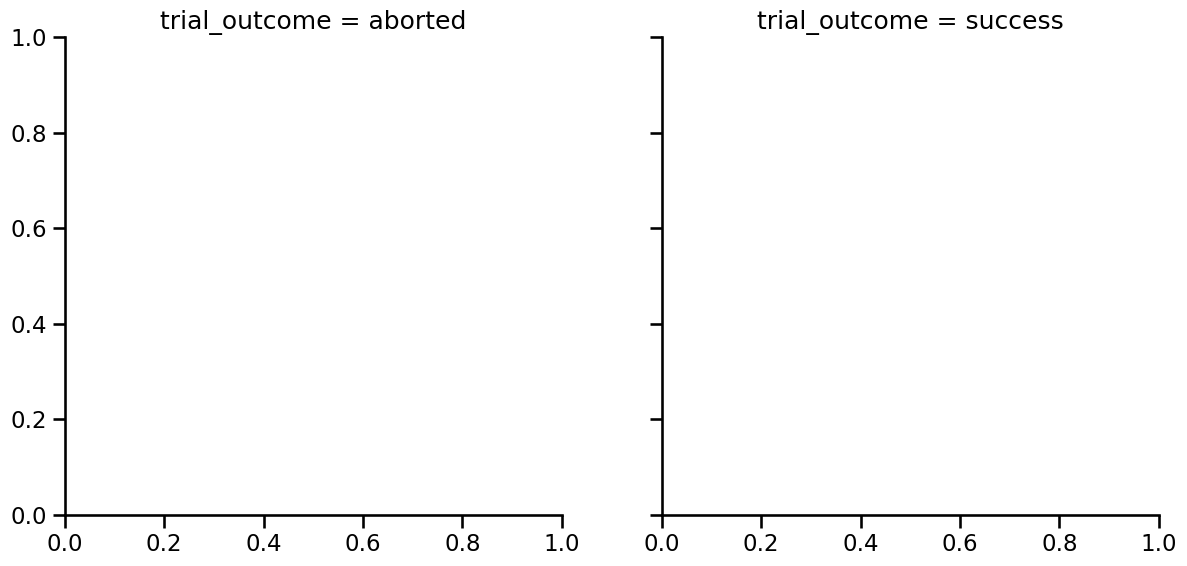

In [ ]:
vars_to_plot = ['hold_for_water_zscored_df_over_f', 
                'first_bar_off_zscored_df_over_f',
                'first_spout_zscored_df_over_f',
                'last_bar_off_zscored_df_over_f']

for v in vars_to_plot:
    fig = plot_subject_average(ds_combined, animal_id, v)
    fig.savefig(f'figures/ACh_subjecct_average_{v}.png', bbox_inches='tight', dpi=300)